In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

In [2]:
df = pd.read_csv('http://bit.ly/w-data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

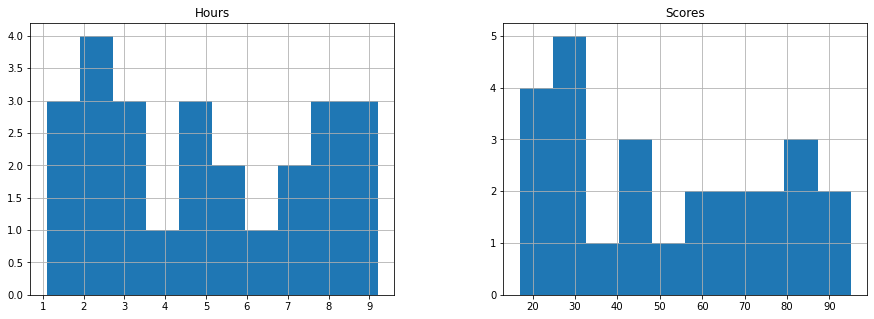

In [5]:
df.hist(figsize=(15,5))

<AxesSubplot:>

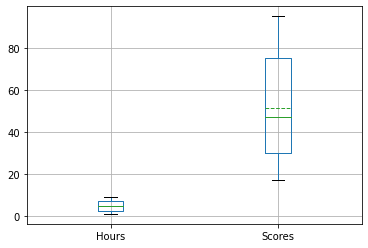

In [6]:
df.boxplot(column=['Hours','Scores'],meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False)

In [7]:
score_corr = df.corr()
score_corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

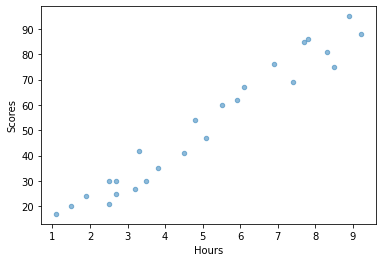

In [8]:
df.plot(x='Hours',y='Scores',kind='scatter', alpha=0.5)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = df[['Hours']].values
Y = df[['Scores']].values

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2,random_state=40)

In [12]:
x_train

array([[8.5],
       [4.8],
       [3.2],
       [5.9],
       [1.9],
       [3.5],
       [8.3],
       [2.5],
       [3.8],
       [2.7],
       [2.5],
       [2.7],
       [7.7],
       [6.9],
       [4.5],
       [5.1],
       [6.1],
       [1.5],
       [5.5],
       [9.2]])

In [13]:
x_test

array([[8.9],
       [7.8],
       [1.1],
       [7.4],
       [3.3]])

In [14]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
print('coef = ',model.coef_,'\tntercept = ',model.intercept_)

coef =  [[9.74054996]] 	ntercept =  [1.7557382]


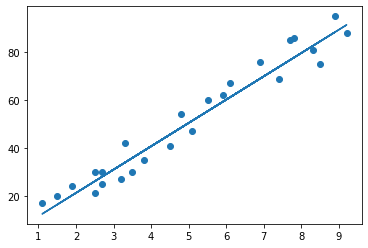

In [16]:
line = model.coef_*df[['Hours']]+model.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

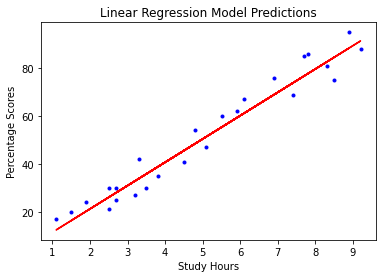

In [17]:
plt.plot(df[['Hours']],df[['Scores']], 'b.')
plt.plot(df[['Hours']], model.predict(df[['Hours']]), 'r-')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.title('Linear Regression Model Predictions')
plt.show()

In [18]:
y_predicted = model.predict(x_test)

In [19]:
y_predicted.shape

(5, 1)

In [20]:
y_predicted[:,-1].shape

(5,)

In [21]:
type(y_test)

numpy.ndarray

In [22]:
tested = pd.DataFrame({'Actual': y_test[:,-1], 'Predicted': y_predicted[:,-1]})

In [23]:
tested

,Actual,Predicted
0,95,88.446633
1,86,77.732028
2,17,12.470343
3,69,73.835808
4,42,33.899553


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.645691144695975

In [25]:
lin_mse

44.1652107906905

In [26]:
err = mean_absolute_error(y_test, y_predicted)
err

6.457450193167183

In [27]:
query = [[9.25]]
predicted_score = model.predict(query)
predicted_score

array([[91.85582532]])

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
r2

0.9466449081971943